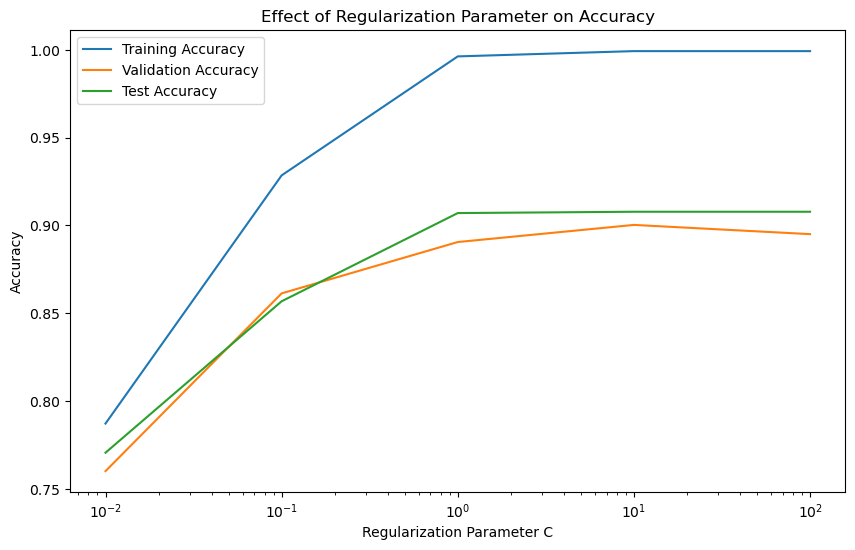

In [2]:
import pandas as pd
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# データを読み込む
train_df = pd.read_csv('train.txt', sep='\t', header=None, names=['Category', 'Title'])
valid_df = pd.read_csv('valid.txt', sep='\t', header=None, names=['Category', 'Title'])
test_df = pd.read_csv('test.txt', sep='\t', header=None, names=['Category', 'Title'])

# Vectorizerを初期化して訓練データに適合する
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['Title'])
X_valid = vectorizer.transform(valid_df['Title'])
X_test = vectorizer.transform(test_df['Title'])

# ラベルを数値に変換する
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['Category'])
y_valid = label_encoder.transform(valid_df['Category'])
y_test = label_encoder.transform(test_df['Category'])

# 正則化パラメータのリスト
C_values = [0.01, 0.1, 1, 10, 100]
train_accuracies = []
valid_accuracies = []
test_accuracies = []

for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    valid_accuracies.append(accuracy_score(y_valid, model.predict(X_valid)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# 結果をプロット
plt.figure(figsize=(10, 6))
plt.plot(C_values, train_accuracies, label='Training Accuracy')
plt.plot(C_values, valid_accuracies, label='Validation Accuracy')
plt.plot(C_values, test_accuracies, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('Regularization Parameter C')
plt.ylabel('Accuracy')
plt.title('Effect of Regularization Parameter on Accuracy')
plt.legend()
plt.show()
